<a href="https://colab.research.google.com/github/saga743k/Deep-Learning-Experiments/blob/main/Ex_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 375ms/step - loss: 0.1806 - val_loss: 0.0749
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 385ms/step - loss: 0.0737 - val_loss: 0.0701
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 381ms/step - loss: 0.0703 - val_loss: 0.0684
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 375ms/step - loss: 0.0688 - val_loss: 0.0675
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 375ms/step - loss: 0.0680 - val_loss: 0.0666
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 180s 385ms/step - loss: 0.0672 - val_loss: 0.0667
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 177s 378ms/step - loss: 0.0664 - val_loss: 0.0662
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 383ms/step - loss: 0.0660 - val_loss: 0.0652
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 381ms/step - loss: 0.0656 - val_loss: 0.0648
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 385ms/step - loss: 0.0651 - val_loss: 0.0645
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


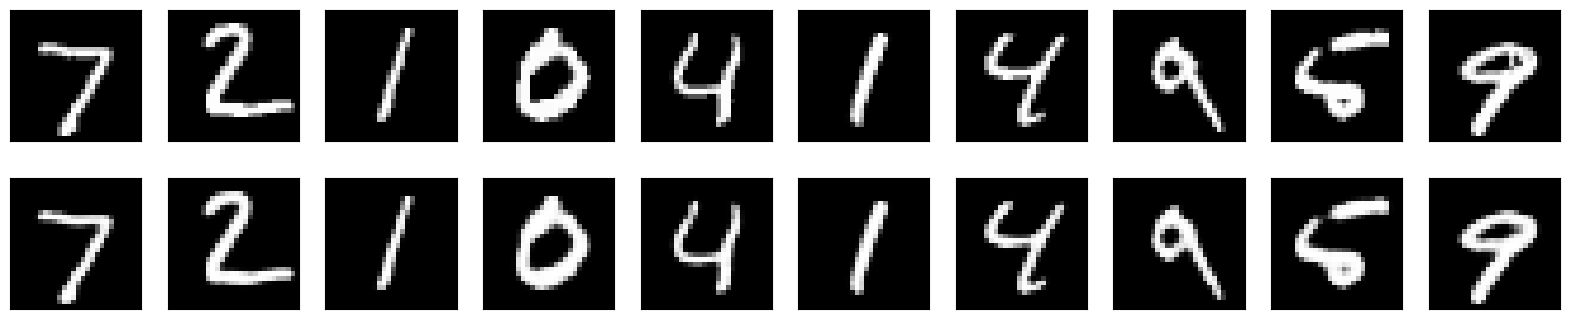

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess dataset (e.g., MNIST)
(x_train, _), (x_test, _) = mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build the Autoencoder model
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

# Create the model
autoencoder = build_autoencoder()

# Train the Autoencoder model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Evaluate the model and visualize some reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Plot some test images and their corresponding reconstructions
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()